# Logistic Regression Project Exercise 

**Copyright by Pierian Data Inc.**

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [4]:
df = pd.read_csv('../DATA/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Visualization Features

<Axes: xlabel='target', ylabel='count'>

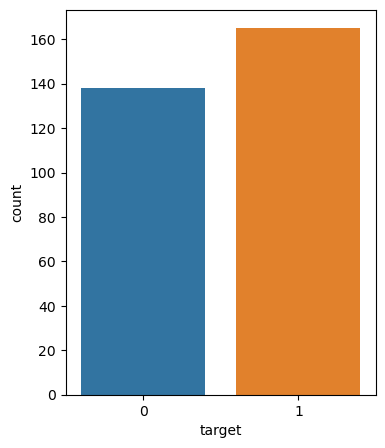

In [9]:
plt.figure(figsize=(4,5))
sns.countplot(df,x='target')

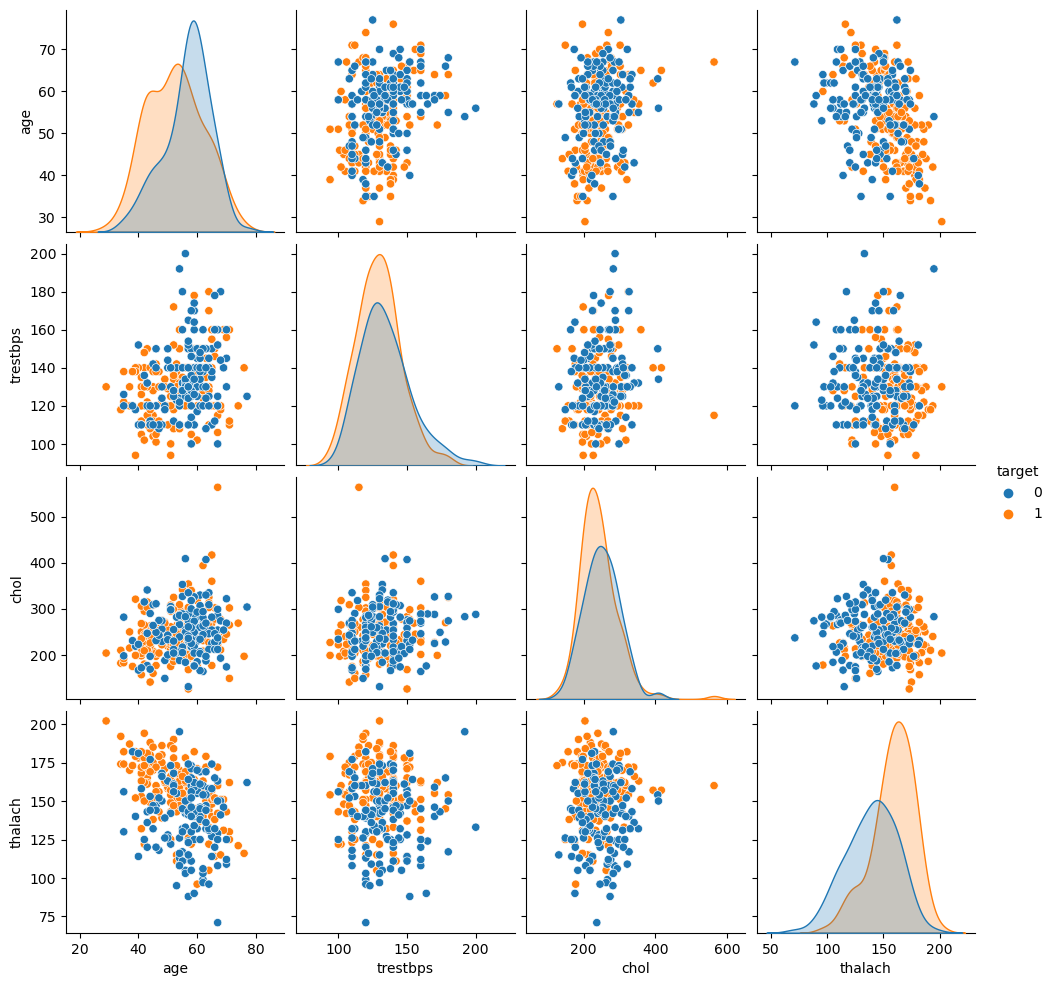

In [10]:
sns.pairplot(df,hue='target',vars=['age','trestbps', 'chol','thalach'])

<Axes: >

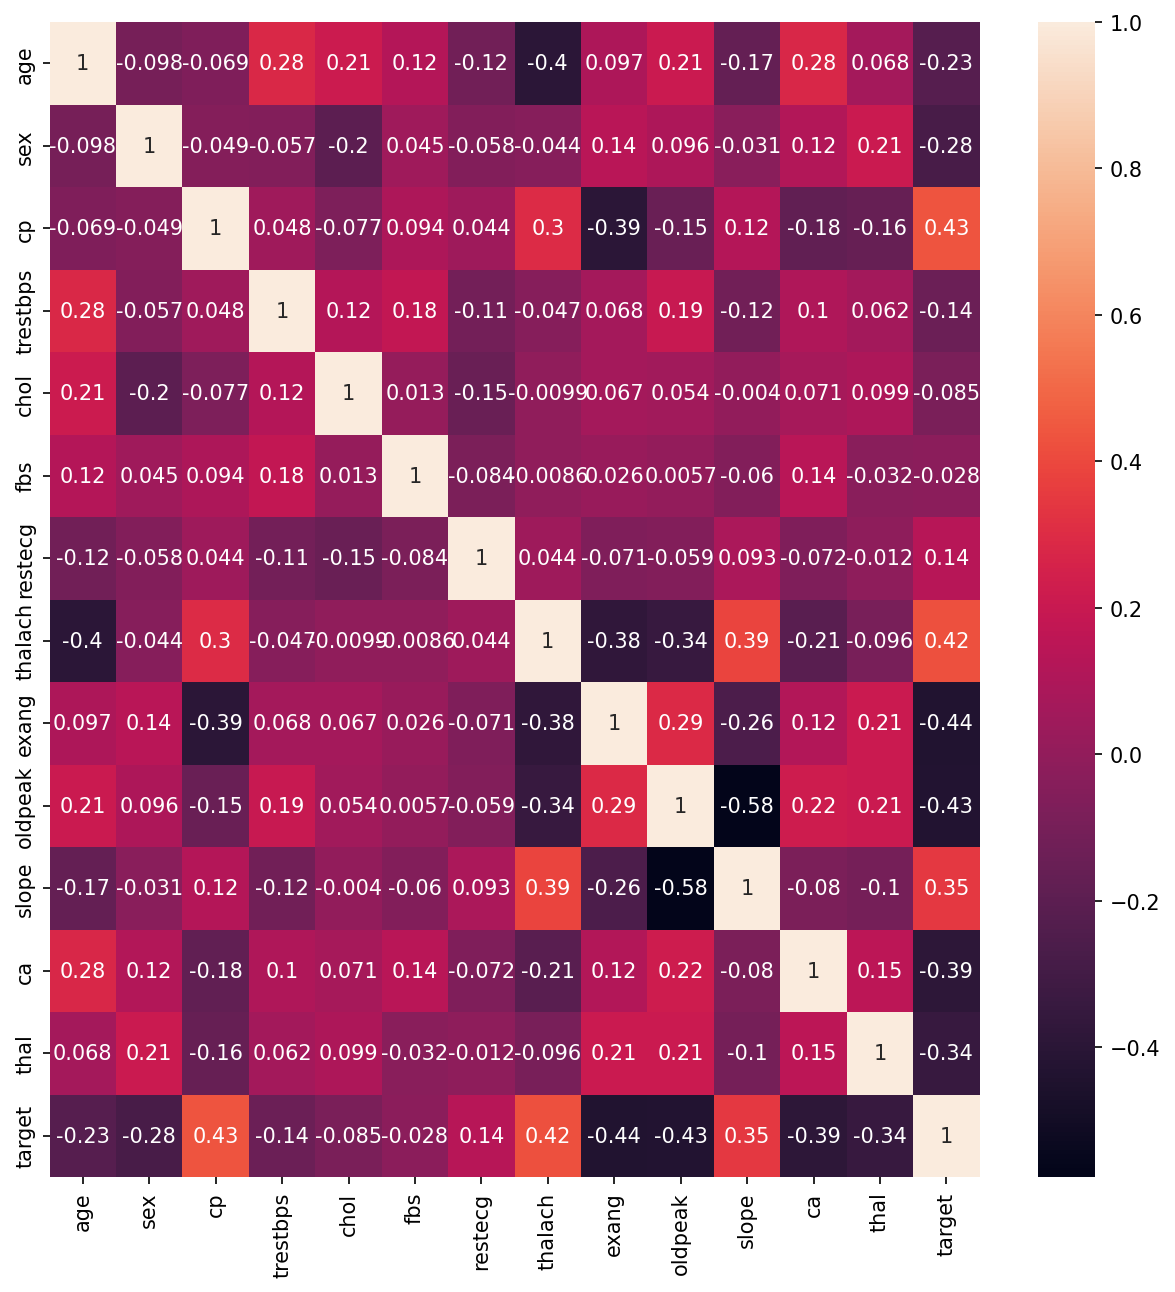

In [11]:
plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(df.corr(),annot=True)

## Train | Test Split and Scaling

In [12]:
X = df.drop('target',axis=1)

In [13]:
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Standardize**

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import GridSearchCV

In [19]:
# it's not that big dataset so I chose solver='lbfgs'
log_model = LogisticRegression(max_iter=10000)

In [23]:
param_grid={'penalty':['l1','l2','elasticnet'],'C':[0.1,1,10]}
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [24]:
grid_model.fit(scaled_X_train,y_train)

/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/kodaik

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [25]:
grid_model.best_params_

{'C': 10, 'penalty': 'l2'}

### Coeffecients

In [26]:
grid_model.best_estimator_.coef_

array([[-0.0670491 , -0.78102916,  0.93745212, -0.27960569, -0.23325168,
         0.04701615,  0.12451924,  0.4525035 , -0.43679025, -0.54407786,
         0.40023348, -0.89460967, -0.59661323]])

In [27]:
df_coef = pd.Series(index=X.columns,data=grid_model.best_estimator_.coef_[0]) 

In [28]:
df_coef

age        -0.067049
sex        -0.781029
cp          0.937452
trestbps   -0.279606
chol       -0.233252
fbs         0.047016
restecg     0.124519
thalach     0.452504
exang      -0.436790
oldpeak    -0.544078
slope       0.400233
ca         -0.894610
thal       -0.596613
dtype: float64

In [29]:
df_coef = df_coef.sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ca'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'thal'),
  Text(3, 0, 'oldpeak'),
  Text(4, 0, 'exang'),
  Text(5, 0, 'trestbps'),
  Text(6, 0, 'chol'),
  Text(7, 0, 'age'),
  Text(8, 0, 'fbs'),
  Text(9, 0, 'restecg'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'thalach'),
  Text(12, 0, 'cp')])

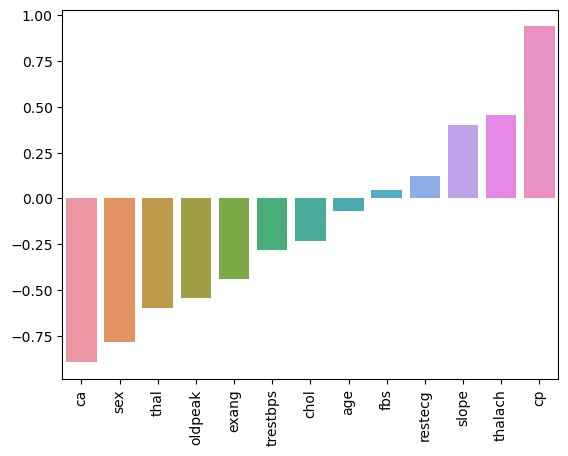

In [30]:
sns.barplot(x=df_coef.index,y=df_coef.values)
plt.xticks(rotation=90)

---------

## Model Performance Evaluation

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [32]:
y_pred = grid_model.predict(scaled_X_test)

In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[12,  3],
       [ 2, 14]])

<Figure size 750x750 with 0 Axes>

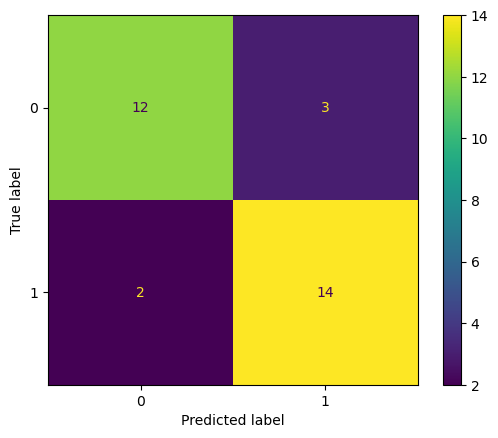

In [35]:
plt.figure(figsize=(5,5),dpi=150)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



## Performance Curves

In [55]:
from sklearn.metrics import precision_recall_curve,roc_curve,RocCurveDisplay,PrecisionRecallDisplay

**Precision Recall Curve**

In [38]:
pos_prob = grid_model.predict_proba(X_test)[:,1]

/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [39]:
pos_prob

array([5.36334910e-22, 2.25940472e-11, 3.27657847e-16, 1.95396252e-10,
       3.47084050e-18, 2.14275778e-11, 1.07286989e-01, 7.57394440e-25,
       1.07272632e-28, 9.72089077e-05, 3.69485104e-17, 2.37873294e-08,
       7.76790739e-14, 3.37393086e-07, 2.70298319e-14, 1.32643843e-07,
       7.44115759e-17, 3.69958133e-21, 2.60595690e-03, 1.40539481e-29,
       6.69370908e-27, 2.94757844e-08, 2.09702480e-16, 1.04105177e-20,
       1.91044654e-14, 1.14478213e-07, 3.84059079e-18, 3.05311190e-18,
       1.50681437e-13, 1.23042952e-13, 1.27678088e-25])

Text(0.5, 1.0, 'Precision Recall Curve')

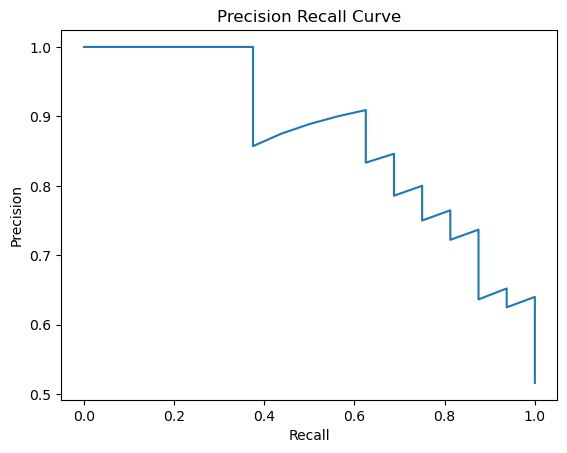

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test,pos_prob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

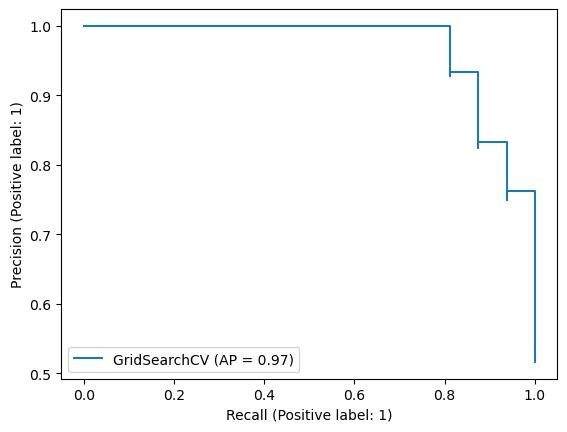

In [57]:
PrecisionRecallDisplay.from_estimator(grid_model,scaled_X_test,y_test)

**ROC Curve**

Text(0.5, 1.0, 'ROC Curve')

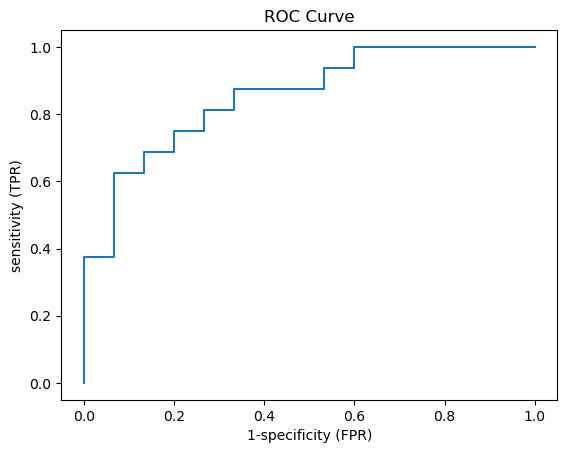

In [58]:
fpr,tpr,thresholds = roc_curve(y_test,pos_prob)
plt.plot(fpr,tpr)
plt.xlabel('1-specificity (FPR)') 
plt.ylabel('sensitivity (TPR)')
plt.title('ROC Curve')

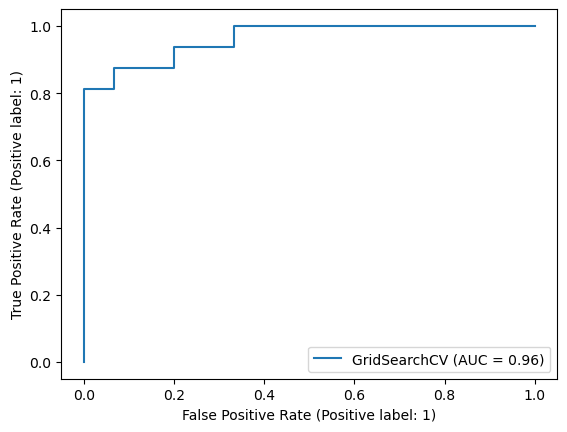

In [53]:
RocCurveDisplay.from_estimator(grid_model,scaled_X_test,y_test)

**classify a patient with the following features**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [43]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [45]:
scaled_patient = scaler.transform(patient)

/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
grid_model.predict(scaled_patient)

array([0])

In [47]:
grid_model.predict_proba(scaled_patient)

array([[0.9926279, 0.0073721]])

## FIN.